# fit1
Simple fitting example (1-d histogram with an interpreted function)




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:08 AM.</small></i>

In [1]:
TCanvas *c1 = new TCanvas("c1_fit1","The Fit Canvas",200,10,700,500);
c1->SetGridx();
c1->SetGridy();
c1->GetFrame()->SetFillColor(21);
c1->GetFrame()->SetBorderMode(-1);
c1->GetFrame()->SetBorderSize(5);

gBenchmark->Start("fit1");

We connect the ROOT file generated in a previous tutorial
(see <a href="fillrandom.C.nbconvert.ipynb">Filling histograms with random numbers from a function</a>)

In [2]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/fit/");
TFile *file = nullptr;
if (!gSystem->AccessPathName("fillrandom.root")) {
   // file exists
   file = TFile::Open("fillrandom.root");
} else {
   gROOT->ProcessLine(Form(".x %s../hist/fillrandom.C(0)",dir.Data()));
   file = TFile::Open("fillrandom.root");
   if (!file) return;
}

Warning in <TFile::Init>: file fillrandom.root probably not closed, trying to recover
Info in <TFile::Recover>: fillrandom.root, recovered key TFormula:form1 at address 226
Info in <TFile::Recover>: fillrandom.root, recovered key TF1:sqroot at address 373
Info in <TFile::Recover>: fillrandom.root, recovered key TH1F:h1f at address 697
Warning in <TFile::Init>: successfully recovered 3 keys


The function "ls()" lists the directory contents of this file

In [3]:
file->ls();

TFile**		fillrandom.root	
 TFile*		fillrandom.root	
  KEY: TFormula	form1;1	abs(sin(x)/x)
  KEY: TF1	sqroot;1	x*gaus(0) + [3]*form1
  KEY: TH1F	h1f;1	Test random numbers


Get object "sqroot" from the file. Undefined objects are searched
for using gROOT->FindObject("xxx"), e.g.:
TF1 *sqroot = (TF1*) gROOT.FindObject("sqroot")

In [4]:
TF1 * sqroot = nullptr;
file->GetObject("sqroot",sqroot);
if (!sqroot){
   Error("fit1.C","Cannot find object sqroot of type TF1\n");
   return;
}
sqroot->Print();

Formula based function:     sqroot 
               sqroot : x*gaus(0) + [3]*form1 Ndim= 1, Npar= 4, Number= 0 
 Formula expression: 
	x*[p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))+[p3]*(abs(sin(x)/x)) 


Now get and fit histogram h1f with the function sqroot

In [5]:
TH1F* h1f = nullptr;
file->GetObject("h1f",h1f);
if (!h1f){
   Error("fit1.C","Cannot find object h1f of type TH1F\n");
   return;
}
h1f->SetFillColor(45);
h1f->Fit("sqroot");

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      198.935
NDf                       =          190
Edm                       =  1.49283e-07
NCalls                    =          149
p0                        =      33.1658   +/-   0.545703    
p1                        =      4.00667   +/-   0.0165304   
p2                        =     0.984663   +/-   0.0128238   
p3                        =      63.4464   +/-   1.33233     


We now annotate the picture by creating a PaveText object
and displaying the list of commands in this macro

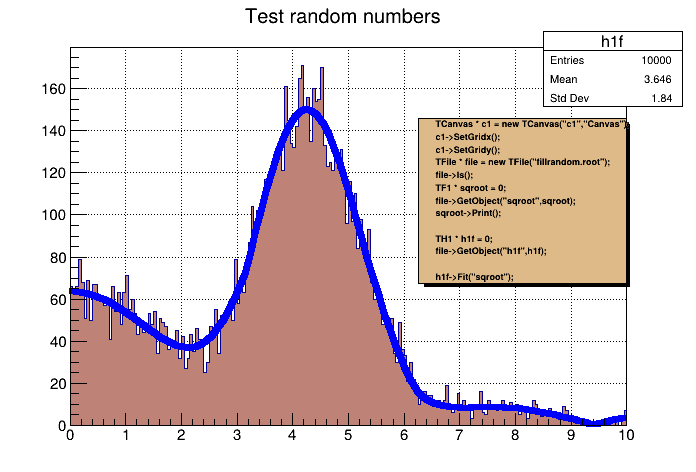

fit1      : Real Time =   1.79 seconds Cpu Time =   0.92 seconds


In [6]:
TPaveText * fitlabel = new TPaveText(0.6,0.4,0.9,0.75,"NDC");
fitlabel->SetTextAlign(12);
fitlabel->SetFillColor(42);
fitlabel->ReadFile(Form("%sfit1_C.txt",dir.Data()));
fitlabel->Draw();
c1->Update();
gBenchmark->Show("fit1");

Draw all canvases 

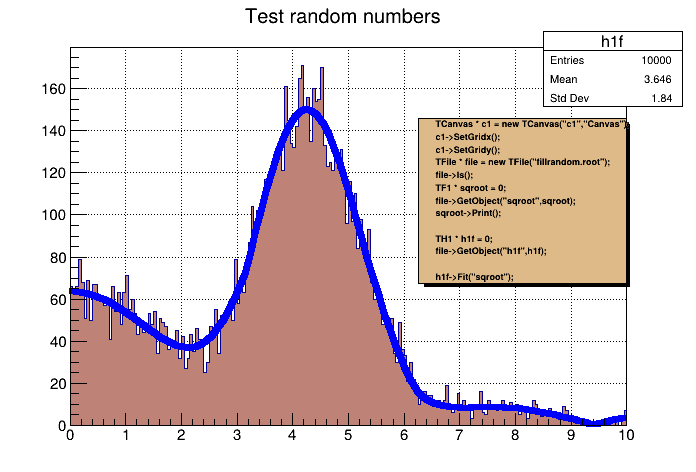

In [7]:
gROOT->GetListOfCanvases()->Draw()